# Data Visualization Tutorial 2

## Load and Setup the Data

In [0]:
# import required library functions
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

#mpl.style.use('ggplot') # optional: for ggplot-like style

In [0]:
# load data, skip the top 20 and bottom 2 rows as they do not contain relevant data
df_canada = pd.read_excel('sample_data/canada.xlsx',
                          sheet_name = 'Canada by Citizenship',
                          skiprows = range(20),
                          skipfooter = 2)

In [0]:
# conversion index and columns to lists
df_canada.columns.tolist()
df_canada.index.tolist()

# remove unnecessary columns
# in pandas axis=0 re|presents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename some columns to make better sense
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [0]:
# convert all column names to strings
df_canada.columns = list(map(str, df_canada.columns))

# full range of the time series
years = list(map(str, range(1980, 2014)))

# add Total column
df_canada['Total'] = df_canada.sum(axis=1)

In [0]:
# index data by country
df_canada.set_index('Country', inplace=True)

## Visualize Parts of a Whole

### Visualize continent wise immigration contributions into Canada

In [0]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,31398
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,30


In [0]:
# group by Continent
df_continents = df_canada.groupby(['Continent'], axis = 0).sum()

# show Continent wise distribution
df_continents.head(6)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,1237896
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,6635588
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,2821894
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,1530296
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,482284
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775,110348


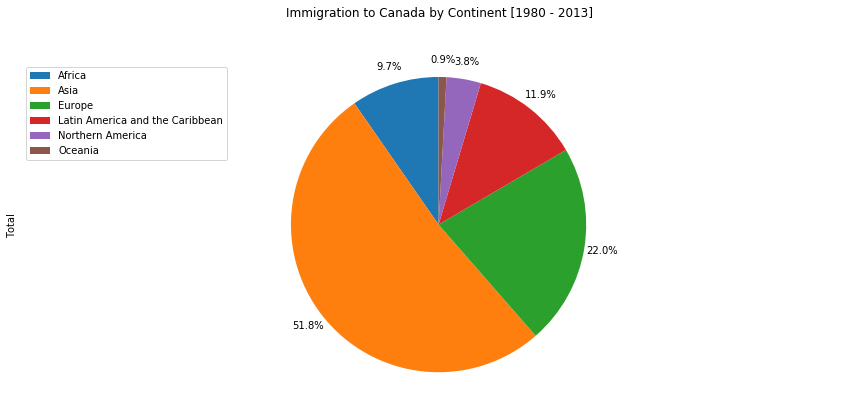

In [0]:
df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

## Visualize Categories and Sub-categories

### Visualize total continent wise immigration into Canada between 1980 and 2013

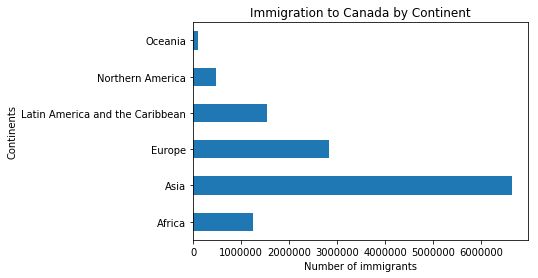

In [0]:
# plot immigration pattern from Continents
df_continents['Total'].plot(kind = 'barh')
plt.title('Immigration to Canada by Continent')
plt.ylabel('Continents')
plt.xlabel('Number of immigrants')

plt.show()

### Visually compare continent wise immigration into Canada from developed vs developing countries

In [0]:
# split data based on level of development
df_development = df_canada.groupby(['Continent', 'DevName'], axis = 0).sum()

df_development.head(12)

1980  ...    Total
Continent                       DevName                    ...         
Africa                          Developing regions   3951  ...  1237896
Asia                            Developed regions     701  ...    55414
                                Developing regions  30324  ...  6580174
Europe                          Developed regions   39760  ...  2821894
Latin America and the Caribbean Developing regions  13081  ...  1530296
Northern America                Developed regions    9378  ...   482284
Oceania                         Developed regions    1304  ...    68430
                                Developing regions    638  ...    41918

[8 rows x 35 columns]

In [0]:
df_development = df_development.unstack('DevName').fillna(0)

df_development.head(6)

1980  ...              Total
DevName                         Developed regions  ... Developing regions
Continent                                          ...                   
Africa                                        0.0  ...          1237896.0
Asia                                        701.0  ...          6580174.0
Europe                                    39760.0  ...                0.0
Latin America and the Caribbean               0.0  ...          1530296.0
Northern America                           9378.0  ...                0.0
Oceania                                    1304.0  ...            41918.0

[6 rows x 70 columns]

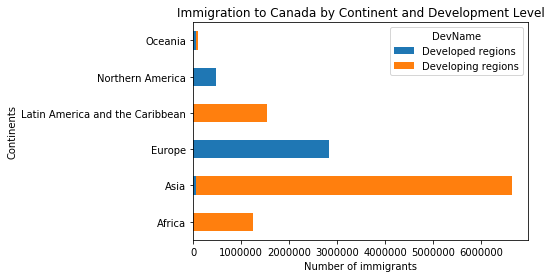

In [0]:
# plot immigration pattern from continents based on level of development
df_development['Total'].plot(kind = 'barh', stacked=True)

plt.title('Immigration to Canada by Continent and Development Level')
plt.ylabel('Continents')
plt.xlabel('Number of immigrants')

plt.show()

## Visualize Proportions varying over Time

### Visualize total immigration contributions from each continent over time

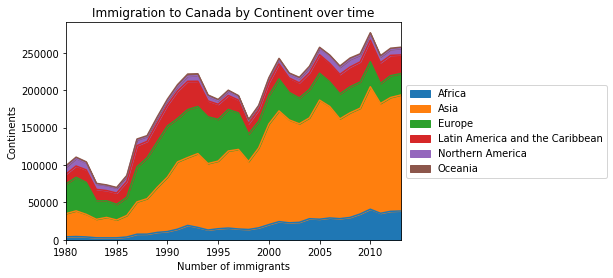

In [0]:
df_continents[years].transpose().plot(kind='area', stacked=True)

plt.title('Immigration to Canada by Continent over time')
plt.ylabel('Continents')
plt.xlabel('Number of immigrants')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

### Visualize fractional immigration contributions from each continent over time

In [0]:
# compute Continent wise proportion
df_fraction = df_continents.divide(df_continents.sum(axis = 0), axis = 1)

df_fraction.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,0.039854,0.039462,0.036626,0.035354,0.035945,0.037869,0.043952,0.055605,0.054212,0.060171,0.058558,0.068566,0.086798,0.074448,0.067498,0.078876,0.078467,0.075024,0.085804,0.088957,0.093885,0.100114,0.101788,0.107530,0.121474,0.106903,0.118143,0.121701,0.122980,0.138820,0.147648,0.143956,0.148633,0.149660,0.096573
Asia,0.312951,0.310357,0.289764,0.326883,0.371494,0.340821,0.333988,0.320566,0.340646,0.366449,0.387277,0.433543,0.409370,0.444663,0.458792,0.481717,0.514931,0.551536,0.565736,0.594179,0.620842,0.610292,0.616971,0.606400,0.581042,0.618562,0.603318,0.574252,0.575584,0.568538,0.591592,0.596660,0.594086,0.602146,0.517665
Europe,0.401061,0.405217,0.409702,0.326115,0.303567,0.297865,0.283214,0.346499,0.392847,0.370323,0.363199,0.279207,0.289250,0.283437,0.322882,0.297072,0.278092,0.253213,0.228456,0.198195,0.176340,0.176304,0.164931,0.159027,0.164088,0.139654,0.133787,0.144123,0.142738,0.141007,0.120687,0.108768,0.113874,0.111405,0.220146
Latin America and the Caribbean,0.131949,0.137614,0.160821,0.204196,0.186306,0.216797,0.246130,0.211255,0.157380,0.152403,0.148585,0.177472,0.170750,0.152399,0.110195,0.107942,0.093185,0.089038,0.086047,0.083907,0.077974,0.082702,0.086580,0.093250,0.095574,0.096121,0.099880,0.111921,0.109226,0.108000,0.104053,0.113147,0.106053,0.096879,0.119384
Northern America,0.094596,0.090718,0.087023,0.093977,0.090728,0.093501,0.082210,0.057171,0.046437,0.041294,0.031347,0.029189,0.030881,0.033497,0.030475,0.026056,0.027568,0.024642,0.027606,0.028896,0.025070,0.023096,0.022177,0.025509,0.030119,0.032604,0.038910,0.040718,0.041926,0.036158,0.029398,0.031183,0.030801,0.033017,0.037625


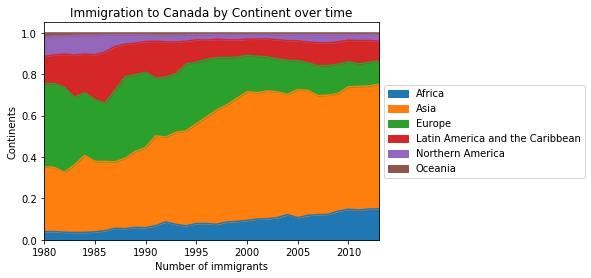

In [0]:
df_fraction[years].transpose().plot(kind='area', stacked=True)

plt.title('Immigration to Canada by Continent over time')
plt.ylabel('Continents')
plt.xlabel('Number of immigrants')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

## Visualize Parts of a Whole using Waffle Charts

### Visualize continent wise immigration contributions into Canada

In [0]:
# special library for Waffle Charts
from pywaffle import Waffle
import json

In [0]:
# group by Continent
df_continents = df_canada.groupby(['Continent'], axis = 0).sum()

# compute fraction
df_fraction = df_continents.divide(df_continents.sum(axis = 0), axis = 1)['Total'] * 100

df_fraction.head(6)

Continent
Africa                              9.657251
Asia                               51.766497
Europe                             22.014563
Latin America and the Caribbean    11.938364
Northern America                    3.762463
Oceania                             0.860863
Name: Total, dtype: float64

In [0]:
df_waffle = df_fraction.round(0).astype(int)

df_waffle.head(6)

Continent
Africa                             10
Asia                               52
Europe                             22
Latin America and the Caribbean    12
Northern America                    4
Oceania                             1
Name: Total, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


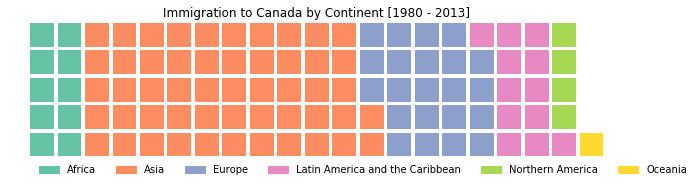

In [0]:
# plot waffle chart
data = json.loads(df_waffle.to_json(orient='index'))
fig = plt.figure(
    FigureClass=Waffle,
    rows=5, 
    values=data,
    figsize=(10, 4),
    title={'label': 'Immigration to Canada by Continent [1980 - 2013]', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (0.0, 0.0), 'ncol': len(data), 'framealpha': 0}
)

plt.show()

In [0]:
data

{'Africa': 10,
 'Asia': 52,
 'Europe': 22,
 'Latin America and the Caribbean': 12,
 'Northern America': 4,
 'Oceania': 1}